# **4.8**

## **데이터 전처리**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib

cust_df= pd.read_csv("/content/train.santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (16119, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0.0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0.0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0.0


- 클래스 값 칼럼을 포함한 피처가 371개 존재
<br>
- 피처의 타입과 Null 값을 더 알아보기

In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16119 entries, 0 to 16118
Columns: 371 entries, ID to TARGET
dtypes: float64(217), int64(154)
memory usage: 45.6 MB


- 111개의 피처가 float형, 260개의 피처가 int형, 즉 모든 피처가 숫자 형
<br>
- Null 값은 없음
<br>
-> 전체 데이터에서 만족과 불만족의 비율을 살펴보기 위해 레이블인 Target 속성의 값의 분포를 알아보기

In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt= cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt=cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0.0    15473
1.0      645
Name: count, dtype: int64
unsatisfied 비율은 0.04


- 불만족인 고객은 4%에 불과
<br>
-> DataFrame의 describe()메서드를 이용해 각 피처의 값 분포를 확인하기

In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,16119.000000,16119.000000,16119.000000,16119.000000,16119.000000,16119.000000,16119.000000,16119.000000,16119.000000,16119.000000,...,16118.000000,16118.000000,16118.00000,16118.000000,16118.000000,16118.000000,16118.000000,16118.000000,1.611800e+04,16118.000000
mean,16176.360506,-1672.285626,33.199082,93.210748,73.892688,125.112699,5.271059,9.297960,0.887772,1.129723,...,3.677269,0.788197,6.99673,4.976635,16.233518,2.572987,34.786966,29.004548,1.171695e+05,0.040017
std,9349.122760,40894.325335,12.859044,2178.974719,347.121414,572.213969,124.939652,199.472781,57.217503,62.289491,...,241.899045,63.316783,533.23849,364.551159,596.299948,170.260344,1104.213120,984.339173,1.704872e+05,0.196006
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.486360e+03,0.000000
25%,8072.500000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.813887e+04,0.000000
50%,16252.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.073418e+05,0.000000
75%,24221.500000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.192694e+05,0.000000
max,32352.000000,235.000000,102.000000,210000.000000,12888.030000,15182.460000,7904.220000,11073.570000,6600.000000,6600.000000,...,22217.130000,6643.290000,63317.19000,42767.160000,44990.490000,18928.590000,78561.150000,78561.150000,9.792857e+06,1.000000


- var3 칼럼의 min값이 -999999-> 특정 예외 값이나 NaN을 -999999로 변환했을 것
<br>
-> 편차가 너무 심하므로 값이 가장 많은 2로 변환하기
<br>
-> 단순 식별자에 불과한 ID피처 또한 드롭하기
<br>
-> 클래스 데이터 세트와 피처 데이터 세트 분리하여 별도의 데이터 세트로 저장

In [5]:
# -999999를 가장 많은 값 2로 변환, ID 피처(단순 식별자) 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리, 레이블 칼럼은 DF 맨 마지막에 위치하므로 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(16119, 369)


<ipython-input-5-febc8ca47845>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_df['var3'].replace(-999999, 2, inplace=True)


-> 원본 데이터 세트에서 학습 데이터 세트와 테스트 데이터 세트 분리
<br>
-> 비대칭한 데이터 세트-> Target값 분포도가 비슷하게 추출됐는지 확인

In [6]:
# 학습/테스트 데이터 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

# 비대칭한 데이터 세트이므로 Target 값 분포도가 학습/테스트 데이터 세트에 비슷하게 추출되었는지 확인
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(12895, 369), 테스트 세트 Shape:(3224, 369)
 학습 세트 레이블 값 분포 비율
TARGET
0.0    0.959829
1.0    0.040171
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0.0    0.960596
1.0    0.039404
Name: count, dtype: float64


-> 원본 데이터와 유사하게 전체 데이터의 4% 정도의 불만족 값으로 만들어짐.

## **XGBoost 모델 학습과 하이퍼 파라미터 튜닝**

XGBoost 학습 모델 생성하고 예측 결과를 ROC-AUC로 평가

In [10]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


y_labels.replace([np.inf, -np.inf], np.nan, inplace=True)

y_labels.dropna(inplace=True)
X_features = X_features.loc[y_labels.index]


X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)


# XGBClassifier 객체 생성 시 early_stopping_rounds와 eval_metric 지정
xgb_clf = XGBClassifier(
    n_estimators=500,
    random_state=156,
    early_stopping_rounds=100,
    eval_metric="auc"
)

# 학습 수행 시 eval_set만 fit() 함수에 전달
xgb_clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

# 예측 및 ROC AUC 점수 출력
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.84676	validation_1-auc:0.80549
[1]	validation_0-auc:0.87002	validation_1-auc:0.80765
[2]	validation_0-auc:0.87843	validation_1-auc:0.80717
[3]	validation_0-auc:0.88329	validation_1-auc:0.81224
[4]	validation_0-auc:0.89172	validation_1-auc:0.80752
[5]	validation_0-auc:0.89516	validation_1-auc:0.80595
[6]	validation_0-auc:0.89941	validation_1-auc:0.81017
[7]	validation_0-auc:0.90357	validation_1-auc:0.80734
[8]	validation_0-auc:0.90686	validation_1-auc:0.80471
[9]	validation_0-auc:0.91024	validation_1-auc:0.80770
[10]	validation_0-auc:0.91305	validation_1-auc:0.80622
[11]	validation_0-auc:0.91584	validation_1-auc:0.80788
[12]	validation_0-auc:0.91944	validation_1-auc:0.80873
[13]	validation_0-auc:0.92165	validation_1-auc:0.80730
[14]	validation_0-auc:0.92378	validation_1-auc:0.80741
[15]	validation_0-auc:0.92490	validation_1-auc:0.80884
[16]	validation_0-auc:0.92523	validation_1-auc:0.80988
[17]	validation_0-auc:0.92684	validation_1-auc:0.80881
[18]	validation_0-au

테스트 데이터 세트로 예측 시 ROC AUC는 약 0.8419
<br>
XGBoost의 하이퍼 파라미터 튜닝을한다. 칼럼의 개수가 많으므로 과적합 가능성을 가정하고, max_depth, min_child_weight, colsample_bytree 하이퍼 파라미터만 일차 튜닝 대상으로 한다.

GridSearchCV 적용 후에 최적 파라미터가 어떤 것이고, GridSearchCV에서 재학습된 Estimator에서 ROC-AUC 수치가 어떻게 향상됐는지 확인해 본다.

In [16]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7], 'min_child_weight':[1, 3], 'colsample_bytree':[0.5, 0.75]}

# cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-logloss:0.19732	validation_1-logloss:0.19389
[1]	validation_0-logloss:0.18064	validation_1-logloss:0.17823
[2]	validation_0-logloss:0.16871	validation_1-logloss:0.16741
[3]	validation_0-logloss:0.16070	validation_1-logloss:0.16034
[4]	validation_0-logloss:0.15091	validation_1-logloss:0.15151
[5]	validation_0-logloss:0.14364	validation_1-logloss:0.14603
[6]	validation_0-logloss:0.14076	validation_1-logloss:0.14373
[7]	validation_0-logloss:0.13605	validation_1-logloss:0.14073
[8]	validation_0-logloss:0.13421	validation_1-logloss:0.14002
[9]	validation_0-logloss:0.13307	validation_1-logloss:0.13871
[10]	validation_0-logloss:0.13060	validation_1-logloss:0.13754
[11]	validation_0-logloss:0.12869	validation_1-logloss:0.13640
[12]	validation_0-logloss:0.12782	validation_1-logloss:0.13688
[13]	validation_0-logloss:0.12697	validation_1-logloss:0.13716
[14]	validation_0-logloss:0.12583	validation_1-logloss:0.13735
[15]	validation_0-logloss:0.12418	validation_1-logloss:0.13683
[1

colsample_bytree: 0.5, max_depth: 5, min_child_weight: 1로 하이퍼 파라미터를 적용한 후에 ROC-AUC가 0.8434로 조금 개선됨
<br>

앞에서 구한 최적화 하이퍼 파라미터를 기반으로 다른 하이퍼 파라미터를 변경 또는 추가해 다시 최적화를 진행

In [17]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함.
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5, min_child_weight=1, colsample_bytree=0.5, reg_alpha=0.03)

# 성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
xgb_clf = XGBClassifier(
    n_estimators=500,
    random_state=156,
    early_stopping_rounds=200,
    eval_metric="auc"
)

xgb_clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.84676	validation_1-auc:0.80549
[1]	validation_0-auc:0.87002	validation_1-auc:0.80765
[2]	validation_0-auc:0.87843	validation_1-auc:0.80717
[3]	validation_0-auc:0.88329	validation_1-auc:0.81224
[4]	validation_0-auc:0.89172	validation_1-auc:0.80752
[5]	validation_0-auc:0.89516	validation_1-auc:0.80595
[6]	validation_0-auc:0.89941	validation_1-auc:0.81017
[7]	validation_0-auc:0.90357	validation_1-auc:0.80734
[8]	validation_0-auc:0.90686	validation_1-auc:0.80471
[9]	validation_0-auc:0.91024	validation_1-auc:0.80770
[10]	validation_0-auc:0.91305	validation_1-auc:0.80622
[11]	validation_0-auc:0.91584	validation_1-auc:0.80788
[12]	validation_0-auc:0.91944	validation_1-auc:0.80873
[13]	validation_0-auc:0.92165	validation_1-auc:0.80730
[14]	validation_0-auc:0.92378	validation_1-auc:0.80741
[15]	validation_0-auc:0.92490	validation_1-auc:0.80884
[16]	validation_0-auc:0.92523	validation_1-auc:0.80988
[17]	validation_0-auc:0.92684	validation_1-auc:0.80881
[18]	validation_0-au

 ROC AUC가 0.8457-> 이전 테스트보다 살짝 향상된 결과
 <br>
 튜닝된 모델에서 각 피처의 중요도를 피처 중요도 그래프로 나타내기: xgboost 모듈의 plot_importance()메서드 이용

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

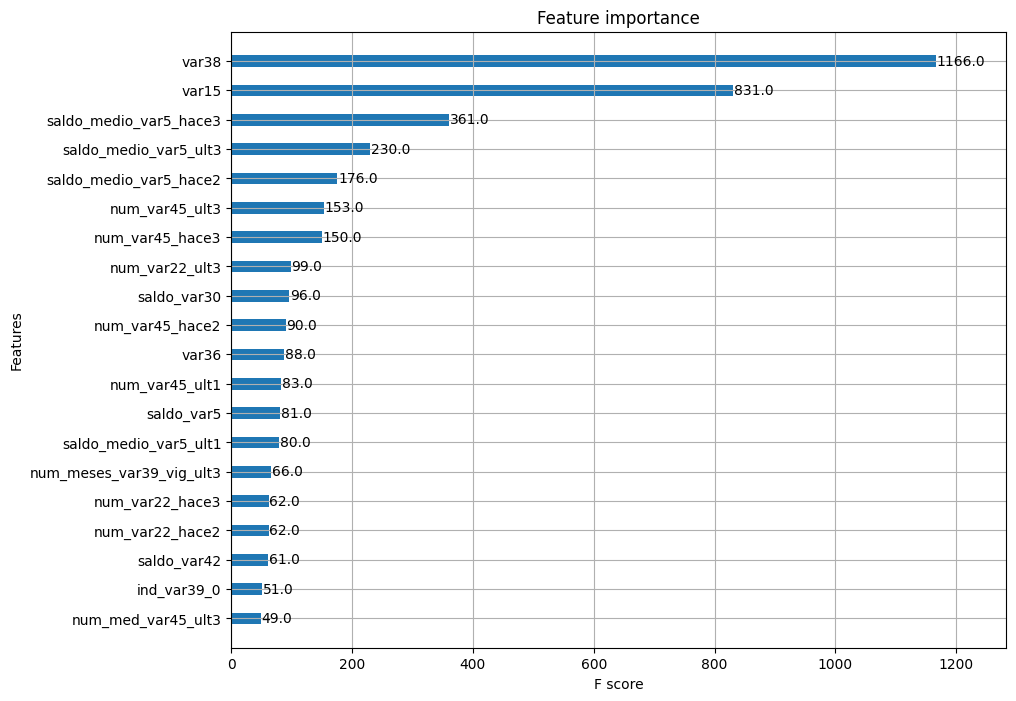

In [18]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

XGBoost의 예측 성능을 좌우하는 가장 중요한 피처는 var38, var15 순

LightGBM을 이용해 모델을 학습하고 하이퍼 파라미터를 튜닝해 예측 성능을 평가해보기

In [24]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

# LGBMClassifier 객체 생성 시 early_stopping_round 및 eval_metric 설정
lgbm_clf = LGBMClassifier(n_estimators=500, random_state=156, early_stopping_rounds=100, eval_metric="AUC")

# 학습 수행 시 eval_set만 fit() 함수에 전달, verbose는 제거
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, eval_set=evals)

# 예측 및 ROC AUC 점수 출력
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 523, number of negative: 12371
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9039
[LightGBM] [Info] Number of data points in the train set: 12894, number of used features: 205
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040562 -> initscore=-3.163529
[LightGBM] [Info] Start training from score -3.163529
Training unti

LightGBM 수행 결과 ROC AUC가 약 0.8211
<br>
XGBoost에 비해 학습에 걸리는 시간이 좀 더 단축되었음

GridSearchCV로 좀 더 다양한 하이퍼 파라미터에 대한 튜닝을 수행해 본다. 튜닝 대상은 num_leaves, max_depth, min_child_samples, subsample

In [27]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200, early_stopping_rounds=30, eval_metric="auc")

params = {'num_leaves':[32, 64], 'max_depth':[128, 160], 'min_child_samples':[60, 100], 'subsample':[0.8, 1]}

# 하이퍼 파라미터 테스트의 수행속도를 향상시키기 위해 cv를 지정하지 않는다.
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 419, number of negative: 9896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8009
[LightGBM] [Info] Number of data points in the train set: 10315, number of used features: 156
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored.

해당 하이퍼 파라미터를 LightGBM에 적용하고 다시 학습해 ROC-AUC 측정 결과를 도출해보기

In [29]:
from lightgbm import LGBMClassifier, early_stopping
from sklearn.metrics import roc_auc_score

# LGBMClassifier 객체 생성
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=60, max_depth=128)

# 조기 중단을 위한 콜백 설정
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train,y_train,eval_set=evals,eval_metric="auc",callbacks=[early_stopping(stopping_rounds=100, verbose=True)])

# 예측 및 ROC AUC 점수 출력
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[LightGBM] [Info] Number of positive: 523, number of negative: 12371
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8759
[LightGBM] [Info] Number of data points in the train set: 12894, number of used features: 164
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040562 -> initscore=-3.163529
[LightGBM] [Info] Start training from score -3.163529
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.831297	valid_0's binary_logloss: 0.132664
ROC AUC: 0.8313


LightGBM의 경우 테스트 데이터 세트에서 ROC-AUC가 약 0.8313로 측정

#**4.9**

**언더 샘플링과 오버 샘플링**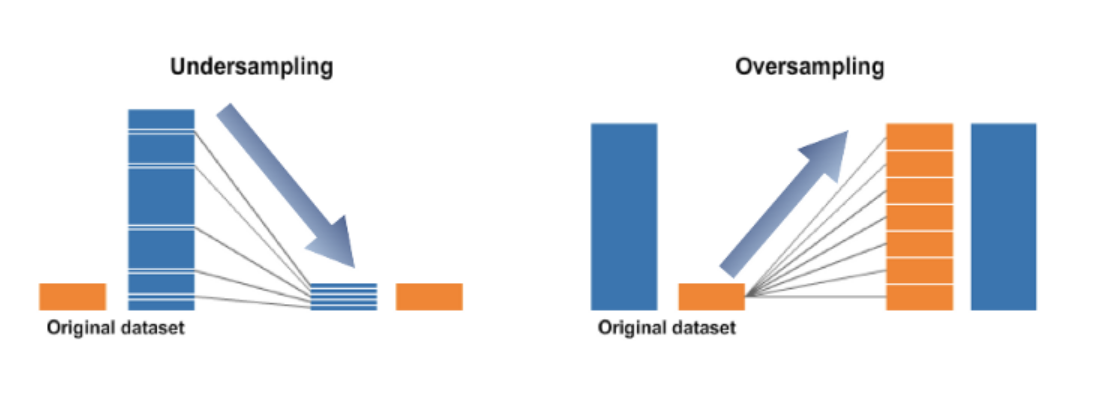

이런 경우 대부분 정상 레이블 쪽으로 예측하면서 제대로된 예측이 힘든데 이때 오버 샘플링(Oversampling) 과 언더 샘플링(Undersampling) 방법을 사용하며, 일반적으로 오버 샘플링이 예측 성능상 더 유리한 경우가 많아 주로 사용된다.
<br>

*   언더 샘플링: 많은 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식이다. 이렇게 학습을 수행하면 과도하게 정상 레이블로 학습/예측하는 부작용을 개선할 수 있지만, 너무 많은 정상 레이블 데이터를 감소시켜 정상 레이블의 경우 오히려 제대로 된 학습을 할 수 없다는 단점이 있어 잘 적용하지 않는다.
*   오버 샘플링: 이상 데이터와 같은 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터를 확보하는 방법이다. 동일한 데이터를 단순히 증식하면 과적합이 되기에 원본 데이터의 피처 값들을 아주 약간만 변경하여 증식한다. 대표적으로 SMOTE(Synthetic Minority Over-sampling Technique) 방법이 있는데, 이는 적은 데이터 세트에 있는 개별 데이터들의 K Nearest Neighbor 를 찾아서 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어 기존 데이터와 약간 차이가 나는 새로운 데이터를 생성하는 방식이다.


## **데이터 일차 가공 및 모델 학습/예측/평가**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df=pd.read_csv('/content/creditcard.csv')
display(card_df.head(5))
display(card_df.shape)
display(card_df.columns)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


(19898, 31)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')



*   Time 은 데이터 생성 관련한 작업용 속성으로 제거한다.

*  V1~V28 은 kaggle 데이터 설명에서 사용자 ID 및 중요한 기능을 보호하기 위한 PCA 차원 감소의 결과 라고 되어있다. 즉, 피처의 의미를 알 수 없다.


*   Amount 는 신용카드 트랜잭션의 금액을 의미한다.
*   Class 는 0이면 정상, 1이면 사기 트랜잭션이다.



In [33]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19898 entries, 0 to 19897
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19898 non-null  int64  
 1   V1      19898 non-null  float64
 2   V2      19898 non-null  float64
 3   V3      19898 non-null  float64
 4   V4      19898 non-null  float64
 5   V5      19898 non-null  float64
 6   V6      19898 non-null  float64
 7   V7      19898 non-null  float64
 8   V8      19898 non-null  float64
 9   V9      19898 non-null  float64
 10  V10     19898 non-null  float64
 11  V11     19897 non-null  float64
 12  V12     19897 non-null  float64
 13  V13     19897 non-null  float64
 14  V14     19897 non-null  float64
 15  V15     19897 non-null  float64
 16  V16     19897 non-null  float64
 17  V17     19897 non-null  float64
 18  V18     19897 non-null  float64
 19  V19     19897 non-null  float64
 20  V20     19897 non-null  float64
 21  V21     19897 non-null  float64
 22

Null 값은 존재하지 않으며, Class 를 제외한 모든 피처는 float64형

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame을 반환하는 함수
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [38]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]

    # Drop rows with NaN values in y_target
    # y_target에 NaN 값이 있는 행 삭제
    df_copy = df_copy.dropna(subset=[y_target.name])
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]

    # train_set_split()으로 학습과 테스트 데이터 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [39]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
Class
0.0    99.576362
1.0     0.423638
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0.0    99.564489
1.0     0.435511
Name: count, dtype: float64


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)

    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

In [41]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[5936    8]
 [   7   19]]
정확도: 0.9975, 정밀도: 0.7037, 재현율: 0.7308, F1: 0.7170, AUC:0.8647


재현율이 0.7908, ROC-AUC가 0.8647 이다.
<br>
 LightGBM 을 이용한 모델을 만들기; 반복적으로 모델을 변경해 학습/예측/평가할 것이므로 함수를 생성

In [42]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [43]:
# 불균형한 레이블 값 분포도를 가지므로 LGBMClassifier에서 boost_from_average=False로 설정해야한다.
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 59, number of negative: 13868
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 13927, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

재현율이 0.8462, ROC-AUC가 0.9229 으로 로지스틱 회귀보다 높은 수치를 나타낸다.

## **데이터 분포도 변환 후 모델 학습/예측/평가**

<Axes: xlabel='Amount', ylabel='Density'>

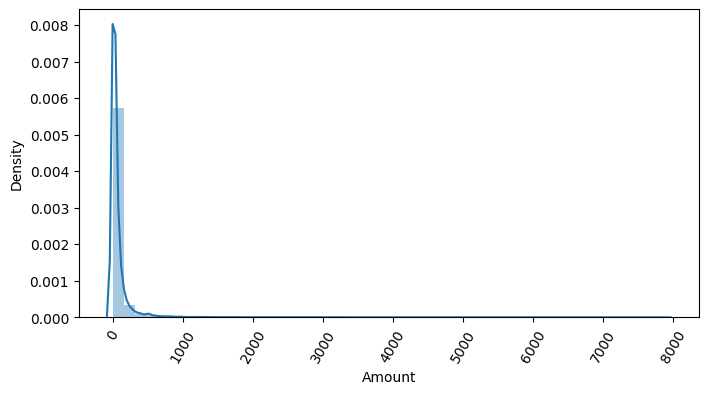

In [44]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

1,000불 이하의 데이터가 대부분이며, 26,000불까지 꼬리가 긴 형태의 분포 곡선을 가지고 있다.

In [45]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처 값 변환하는 로직으로 수정
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [46]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[5940    4]
 [   5   21]]
정확도: 0.9985, 정밀도: 0.8400, 재현율: 0.8077, F1: 0.8235, AUC:0.9035

### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 59, number of negative: 13868
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 13927, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

넘파이의 log1p() 함수를 이용해서 로그 변환을 수행

In [47]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[5938    6]
 [   5   21]]
정확도: 0.9982, 정밀도: 0.7778, 재현율: 0.8077, F1: 0.7925, AUC:0.9033

### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 59, number of negative: 13868
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044003 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 13927, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

##**이상치 데이터 제거 후 모델 학습/예측/평가**

<Axes: >

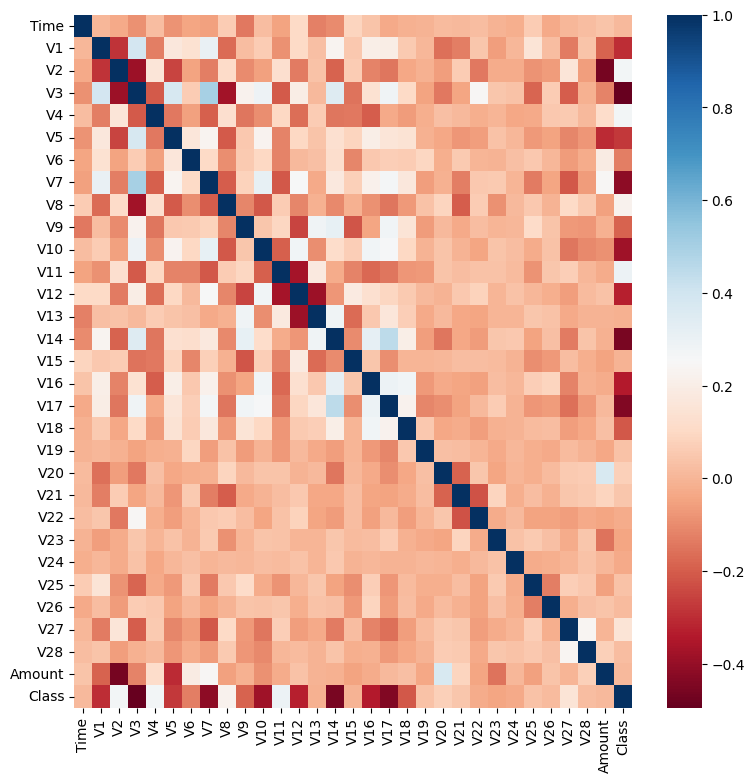

In [52]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr= card_df.corr()
sns.heatmap(corr, cmap='RdBu')

Class와 음의 상관관계가 가장 높은 피처는 V14(-0.3)와 V17(-0.33)
<br>
이 중 V14에 대해서만 이상치를 찾아 제거해보기

In [55]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class'] == 1][column]
    q25 = np.percentile(fraud.values, 25)
    q75 = np.percentile(fraud.values, 75)
    iqr = q75 - q25
    iqr_weight = iqr * weight
    low_val = q25 - iqr_weight
    high_val = q75 + iqr_weight
    outlier_index = fraud[(fraud < low_val) | (fraud > high_val)].index
    return outlier_index

In [56]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print(f'이상치 데이터 인덱스: {outlier_index}')

이상치 데이터 인덱스: Index([], dtype='int64')


In [57]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[5938    6]
 [   5   21]]
정확도: 0.9982, 정밀도: 0.7778, 재현율: 0.8077, F1: 0.7925, AUC:0.9033

### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 59, number of negative: 13868
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 13927, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

##**SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가**

이번에는 SMOTE 기법으로 오버 샘플링을 적용한 뒤 두 모델의 예측 성능을 평가해보자, 단 SMOTE 를 적용할 때 반드시 학습 데이터 세트에만 오버 샘플링해야한다. 오버 샘플링은 fit_resample() 메서드를 사용한다.

In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print(f'SMOTE 적용 전 학습용 피처/레이블 데이터 세트: {X_train.shape, y_train.shape}')
print(f'SMOTE 적용 후 학습용 피처/레이블 데이터 세트: {X_train_over.shape, y_train_over.shape}')
print(f'SMOTE 적용 후 레이블 값 분포: \n{pd.Series(y_train_over).value_counts()}')

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ((13927, 29), (13927,))
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ((27736, 29), (27736,))
SMOTE 적용 후 레이블 값 분포: 
Class
0.0    13868
1.0    13868
Name: count, dtype: int64


In [60]:
lr_clf = LogisticRegression()
# ftr_train 과 tgt_train 인자 값이 SMOTE 증식된 X_train_over 와 y_train_over로 변경
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차행렬
[[5915   29]
 [   4   22]]
정확도: 0.9945, 정밀도: 0.4314, 재현율: 0.8462, F1: 0.5714, AUC:0.9206


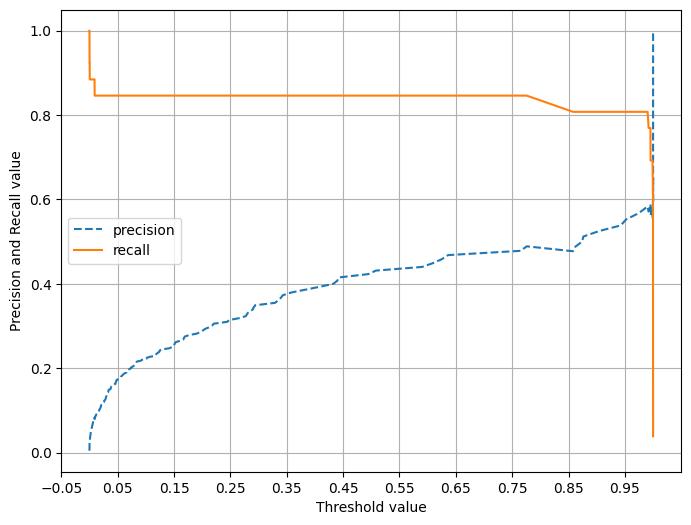

In [62]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

이번에는 LightGBM 모델을 SMOTE로 오버샘플링된 데이터 세트로 학습/예측/평가 수행

In [63]:
lgbm_clf= LGBMClassifier(n_estimators=1000, num_levels=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

[LightGBM] [Warning] Unknown parameter: num_levels
[LightGBM] [Warning] Unknown parameter: num_levels
[LightGBM] [Info] Number of positive: 13868, number of negative: 13868
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 27736, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

#**Beginner Friendly CATBOOST with OPTUNA**

In [67]:
!pip install catboost
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.2 MB/s eta 0:00:00


In [68]:
# 기본 데이터 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
from plotly.offline import iplot

# 데이터 전처리 및 모델 평가
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# 모델링 관련 라이브러리
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import optuna

In [70]:
df = pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [71]:
df.duplicated().sum()

0

duplicates는 없음



In [72]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


결측치 또한 없음

In [73]:
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [74]:
df[categorical].nunique()

,0
Sex,2
ChestPainType,4
RestingECG,3
ExerciseAngina,2
ST_Slope,3


No zero variance and no extremely high variance.

##**Target Variable**

In [75]:
y = df['HeartDisease']
print(f'Percentage of patient had a HeartDisease:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a HeartDisease: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} patient)')

Percentage of patient had a HeartDisease:  55.34 %  --> (508 patient)
Percentage of patient did not have a HeartDisease: 44.66  %  --> (410 patient)


In [83]:
!pip install cufflinks
import cufflinks as cf
import pandas as pd

cf.go_offline() # If you're working offline
cf.set_config_file(offline=False, world_readable=True)

df['HeartDisease'].iplot(kind='hist')

##**Numerical Features**

In [84]:
df[numerical].describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


In [85]:
df[numerical].iplot(kind='hist');


In [80]:
df[numerical].iplot(kind='histogram',subplots=True,bins=50)


In [81]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
skew_vals = df[numerical].drop('FastingBS', axis=1).skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

,0
Oldpeak,1.022872


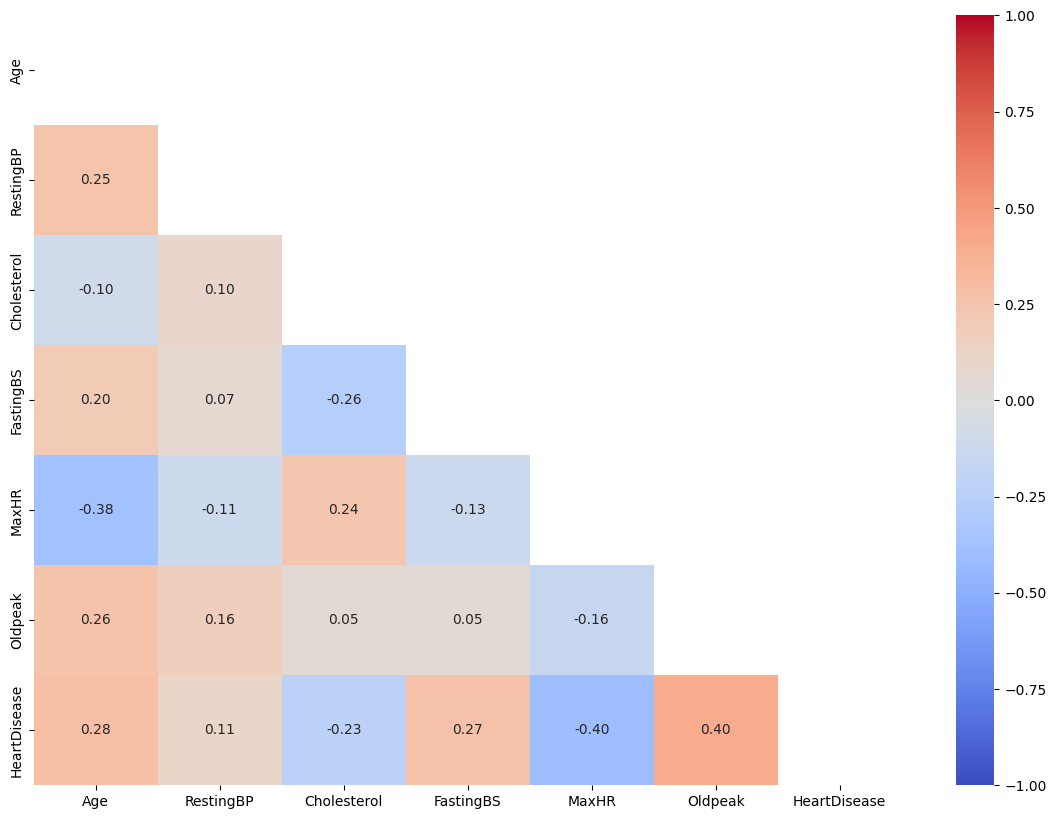

In [86]:
numerical1= df.select_dtypes('number').columns


matrix = np.triu(df[numerical1].corr())
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap (df[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);



*   numerical features와 target variable 사이에 약한 수준의 상관관계 존재
*   Oldpeak은 심장질환과 양의 상관관계 존재
*   콜레스테롤과 심장병은 음의 상관관계 존



##**Categorical Features**

In [87]:
df[categorical].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


**Gender and Heart Disease**

In [88]:
print (f'A female person has a probability of {round(df[df["Sex"]=="F"]["HeartDisease"].mean()*100,2)} % have a HeartDisease')

print()

print (f'A male person has a probability of {round(df[df["Sex"]=="M"]["HeartDisease"].mean()*100,2)} % have a HeartDisease')

print()

A female person has a probability of 25.91 % have a HeartDisease

A male person has a probability of 63.17 % have a HeartDisease



In [89]:
fig = px.histogram(df, x="Sex", color="HeartDisease",width=400, height=400)
fig.show()

**Chest Pain Type and Heart Disease**

In [90]:
df.groupby('ChestPainType')['HeartDisease'].mean().sort_values(ascending=False)

,HeartDisease
ChestPainType,
ASY,0.790323
TA,0.434783
NAP,0.354680
ATA,0.138728


In [91]:
fig = px.histogram(df, x="ChestPainType", color="HeartDisease",width=400, height=400)
fig.show()

**RestingECG and Heart Disease**

In [92]:
df.groupby('RestingECG')['HeartDisease'].mean().sort_values(ascending=False)

,HeartDisease
RestingECG,
ST,0.657303
LVH,0.563830
Normal,0.516304


In [93]:
fig = px.histogram(df, x="RestingECG", color="HeartDisease",width=400, height=400)
fig.show()

**ExerciseAngina and Heart Disease**

In [94]:
df.groupby('ExerciseAngina')['HeartDisease'].mean().sort_values(ascending=False)

,HeartDisease
ExerciseAngina,
Y,0.851752
N,0.351005


In [95]:
fig = px.histogram(df, x="ExerciseAngina", color="HeartDisease",width=400, height=400)
fig.show()

**ST_Slope and Heart Disease**

In [96]:
df.groupby('ST_Slope')['HeartDisease'].mean().sort_values(ascending=False)

,HeartDisease
ST_Slope,
Flat,0.828261
Down,0.777778
Up,0.197468


In [97]:
fig = px.histogram(df, x="ST_Slope", color="HeartDisease",width=400, height=400)
fig.show()

##**MODEL SELECTION**

In [100]:
!pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')


model = DummyClassifier(strategy='constant', constant=1)
pipe = make_pipeline(ct, model)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['DummyClassifier']
dummy_result_df = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
dummy_result_df

model : DummyClassifier(constant=1, strategy='constant') and  accuracy score is : 0.5942


,Accuracy
DummyClassifier,0.5942


##**Logistic & Linear Discriminant & SVC & KNN**

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')


lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()

models = [lr,lda,svm,knn]

for model in models:
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Logistic','LinearDiscriminant','SVM','KNeighbors']
result_df1 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df1

model : LogisticRegression(solver='liblinear') and  accuracy score is : 0.8841
model : LinearDiscriminantAnalysis() and  accuracy score is : 0.8696
model : SVC() and  accuracy score is : 0.7246
model : KNeighborsClassifier() and  accuracy score is : 0.7174


,Accuracy
Logistic,0.8841
LinearDiscriminant,0.8696
SVM,0.7246
KNeighbors,0.7174


##**Logistic & Linear Discriminant & SVC & KNN with Scaler**

In [103]:
accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
s= StandardScaler()
ct1= make_column_transformer((ohe,categorical),(s,numerical))


lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()

models = [lr,lda,svm,knn]

for model in models:
    pipe = make_pipeline(ct1, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Logistic_scl','LinearDiscriminant_scl','SVM_scl','KNeighbors_scl']
result_df2 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df2

model : LogisticRegression(solver='liblinear') and  accuracy score is : 0.8804
model : LinearDiscriminantAnalysis() and  accuracy score is : 0.8696
model : SVC() and  accuracy score is : 0.8841
model : KNeighborsClassifier() and  accuracy score is : 0.8841


,Accuracy
Logistic_scl,0.8804
LinearDiscriminant_scl,0.8696
SVM_scl,0.8841
KNeighbors_scl,0.8841


##**Ensemble Models (AdaBoost & Gradient Boosting & Random Forest & Extra Trees)**

In [105]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import pandas as pd

accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')

ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)



models = [ada,gb,rf,et]

for model in models:
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Ada','Gradient','Random','ExtraTree']
result_df3 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df3

model : AdaBoostClassifier(random_state=0) and  accuracy score is : 0.8659
model : GradientBoostingClassifier(random_state=0) and  accuracy score is : 0.8768
model : RandomForestClassifier(random_state=0) and  accuracy score is : 0.8877
model : ExtraTreesClassifier(random_state=0) and  accuracy score is : 0.8804


,Accuracy
Ada,0.8659
Gradient,0.8768
Random,0.8877
ExtraTree,0.8804


##***Famous Trio (XGBoost & LightGBM & Catboost)**

In [106]:
accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')

xgbc = XGBClassifier(random_state=0)
lgbmc=LGBMClassifier(random_state=0)


models = [xgbc,lgbmc]

for model in models:
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))

model_names = ['XGBoost','LightGBM']
result_df4 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df4

[LightGBM] [Info] Number of positive: 344, number of negative: 298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535826 -> initscore=0.143548
[LightGBM] [Info] Start training from score 0.143548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

,Accuracy
XGBoost,0.8478
LightGBM,0.8732


##**CATBOOST**

In [108]:
accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
categorical_features_indices = np.where(X.dtypes != float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=False,random_state=0)

model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))

model_names = ['Catboost_default']
result_df5 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df5

,Accuracy
Catboost_default,0.8804


##**Catboost HyperParameter Tuning with Optuna**

In [109]:
def objective(trial):
    X= df.drop('HeartDisease', axis=1)
    y= df['HeartDisease']
    categorical_features_indices = np.where(X.dtypes != float)[0]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    cat_cls = CatBoostClassifier(**param)

    cat_cls.fit(X_train, y_train, eval_set=[(X_test, y_test)], cat_features=categorical_features_indices,verbose=0, early_stopping_rounds=100)

    preds = cat_cls.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2024-11-12 04:23:18,125] A new study created in memory with name: no-name-a57a4579-aaec-4d8c-856d-a37f05e8802c
[I 2024-11-12 04:23:23,816] Trial 0 finished with value: 0.8876811594202898 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.047456323266136476, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.8876811594202898.
[I 2024-11-12 04:23:29,256] Trial 1 finished with value: 0.8876811594202898 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.05663776127647686, 'depth': 3, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.8876811594202898.
[I 2024-11-12 04:23:30,718] Trial 2 finished with value: 0.8840579710144928 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09736854216595811, 'depth': 6, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.6607386833981297}. Best is trial 0 with value: 0.8876811594202898.
[I 2024-11-12 04:23:32,214] T

Number of finished trials: 50
Best trial:
  Value: 0.8985507246376812
  Params: 
    objective: Logloss
    colsample_bylevel: 0.032108768674887544
    depth: 8
    boosting_type: Ordered
    bootstrap_type: MVS


In [110]:
accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
categorical_features_indices = np.where(X.dtypes != float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=False,random_state=0,
                          objective= 'CrossEntropy',
    colsample_bylevel= 0.04292240490294766,
    depth= 10,
    boosting_type= 'Plain',
    bootstrap_type= 'MVS')

model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
print(classification_report(y_test, y_pred))

model_names = ['Catboost_tuned']
result_df6 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df6

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       112
           1       0.93      0.91      0.92       164

    accuracy                           0.91       276
   macro avg       0.90      0.91      0.91       276
weighted avg       0.91      0.91      0.91       276



,Accuracy
Catboost_tuned,0.9094


##**Feature Importance**

In [111]:
feature_importance = np.array(model.get_feature_importance())
features = np.array(X_train.columns)
fi={'features':features,'feature_importance':feature_importance}
df_fi = pd.DataFrame(fi)
df_fi.sort_values(by=['feature_importance'], ascending=True,inplace=True)
fig = px.bar(df_fi, x='feature_importance', y='features',title="CatBoost Feature Importance",height=500)
fig.show()